<a href="https://colab.research.google.com/github/sakaratsooksang/datascienceClass/blob/main/Datascience_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
<h6>Author : Sakarat Sooksang 6130824521 <br>
<a href=https://github.com/sakaratsooksang/datascienceClass>GitHub Repository</a>

## Import Library

In [99]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
import seaborn as sns

## Import Dataset

In [97]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/blob/master/fonts/thsarabunnew-webfont.ttf?raw=true

In [111]:
mp.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf?raw=true')
mp.rc('font',family='TH Sarabun New',size=16)

In [32]:
df = pd.read_parquet('https://github.com/sakaratsooksang/datascienceClass/raw/main/confirm_cases-15240-16292139395558.pq')
df

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,None,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
1,2,17/1/2020,None,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
2,3,22/1/2020,None,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,None,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
4,5,24/1/2020,None,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
...,...,...,...,...,...,...,...,...,...,...,...
92246,92247,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None
92247,92248,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None
92248,92249,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None
92249,92250,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None


## Graph ที่ 1
เป็นกราฟแสดงความถี่ของจำนวนผู้ติดเชื้อ COVID-19 โดยจำแนกไปตามช่วงอายุ เพื่อที่จะได้ทำการสังเกตุว่าช่วงอายุได้มีการติดมากที่สุด และอาจจะทำให้เราได้ gain insight จากข้อมูลเหล่านี้ได้ 


In [41]:
def age_group_separate(ageArray):
  group = []
  for age in ageArray:
    if age>100:
      group.append('Error')
    elif age>60: 
      group.append('ผู้สูงอายุ')
    elif age>40:
      group.append('วัยกลางคน')
    elif age>21:
      group.append('ผู้ใหญ่')
    elif age>14:
      group.append('วัยรุ่น')
    else:
      group.append('เด็ก')
  return group

In [48]:
age_group = pd.DataFrame(df.age)
age_group['Age_Group'] = age_group_separate(df['age'].values)
age_group

,age,Age_Group
0,61.0,ผู้สูงอายุ
1,74.0,ผู้สูงอายุ
2,73.0,ผู้สูงอายุ
3,68.0,ผู้สูงอายุ
4,66.0,ผู้สูงอายุ
...,...,...
92246,30.0,ผู้ใหญ่
92247,30.0,ผู้ใหญ่
92248,30.0,ผู้ใหญ่
92249,30.0,ผู้ใหญ่


In [93]:
plot1 = age_group.groupby(['Age_Group']).count()
plot1.reset_index(inplace=True)
plot1.rename(columns={'age':'Count'},inplace=True)
plot1

,Age_Group,Count
0,ผู้สูงอายุ,5512
1,ผู้ใหญ่,46780
2,วัยกลางคน,19970
3,วัยรุ่น,7186
4,เด็ก,4792


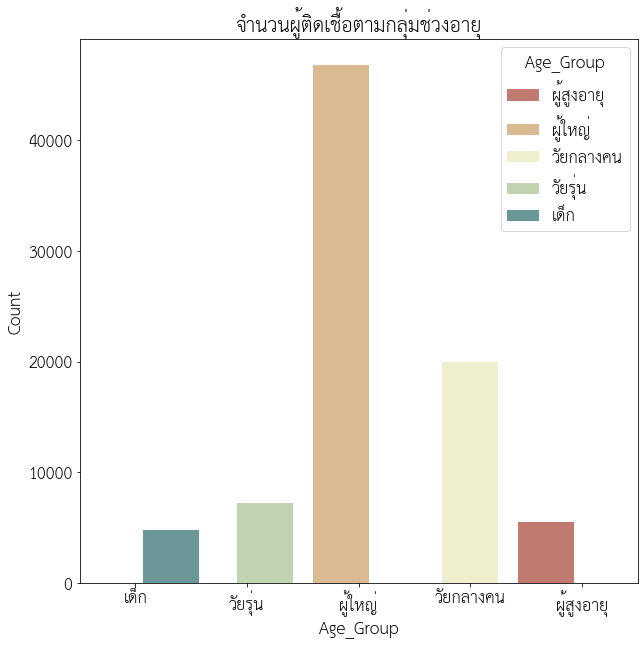

In [258]:
fig = plt.figure(figsize=(10,10))
plt.title('จำนวนผู้ติดเชื้อตามกลุ่มช่วงอายุ')
ax = sns.barplot(data=plot1,x='Age_Group',y='Count',hue='Age_Group',order=['เด็ก', 'วัยรุ่น','ผู้ใหญ่','วัยกลางคน','ผู้สูงอายุ'],palette='Spectral',saturation=0.5)
# palette : https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
#เปลี่ยนขนาด Bar
# references : https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)


กลุ่มผู้ติดเชื้อตามช่วงอายุที่มากที่สุด คือกลุ่มผู้ใหญ่ซึ่งมีอายุตั้งแต่ 21-40ปี ซึ่งเป็นกลุ่มที่ต้องออกจากบ้านมาเรียน/ทำงานตลอดทุกวัน ซึ่งเป็นกลุุ่มที่ต้องเผชิญความเสี่ยงมากที่สุด

## Graph ที่ 2
กราฟจำนวนผู้ติดเชื้อใน10จังหวัดที่มีปริมาณผู้ติดเชื้อสูงที่สุด

In [115]:
df

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,None,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
1,2,17/1/2020,None,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
2,3,22/1/2020,None,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,None,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
4,5,24/1/2020,None,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,None
...,...,...,...,...,...,...,...,...,...,...,...
92246,92247,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None
92247,92248,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None
92248,92249,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None
92249,92250,13/5/2021,12/5/2021,ชาย,30.0,ปี,Thailand,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,กรุงเทพมหานคร,None


In [195]:
province = df[['province_of_onset']].copy()
province = pd.DataFrame(province.value_counts())
province.reset_index(inplace=True)
province.rename(columns={0:'จำนวนผู้ติดเชื้อ','province_of_onset':'พื้นที่ที่เริ่มมีอาการ'},inplace=True)
province.sort_values(['จำนวนผู้ติดเชื้อ'],ascending=False,inplace=True)
plot2 = province.head(10).copy()
plot2.sort_values(['จำนวนผู้ติดเชื้อ'],ascending=True,inplace=True)
plot2

,พื้นที่ที่เริ่มมีอาการ,จำนวนผู้ติดเชื้อ
9,นครปฐม,1277
8,ประจวบคีรีขันธ์,1314
7,สุราษฎร์ธานี,1320
6,ปทุมธานี,2761
5,เชียงใหม่,2864
4,สมุทรปราการ,3517
3,นนทบุรี,3748
2,ชลบุรี,4945
1,สมุทรสาคร,16646
0,กรุงเทพมหานคร,23090


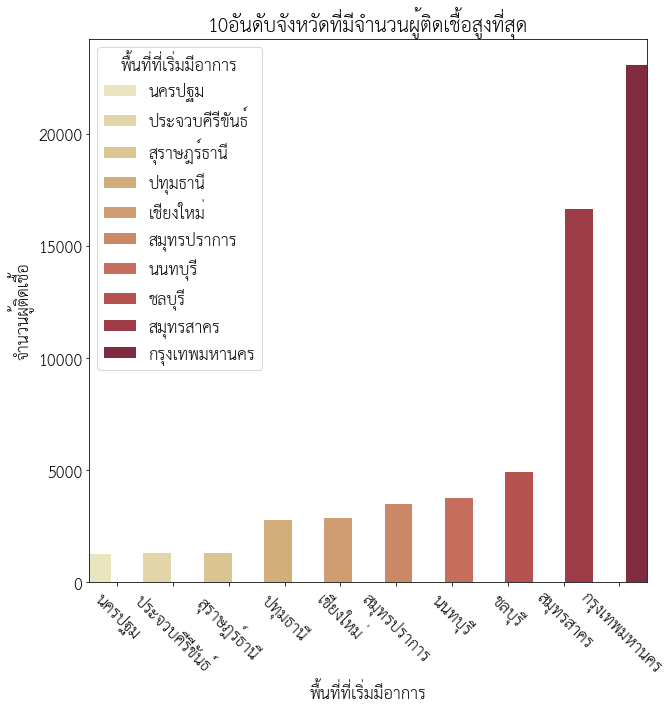

In [200]:
fig = plt.figure(figsize=(10,10))
plt.title('10อันดับจังหวัดที่มีจำนวนผู้ติดเชื้อสูงที่สุด')
plt.xticks(rotation = 315)
ax = sns.barplot(data=plot2,x='พื้นที่ที่เริ่มมีอาการ',y='จำนวนผู้ติดเชื้อ',hue='พื้นที่ที่เริ่มมีอาการ',palette='YlOrRd',saturation=.5,orient="v")
#เปลี่ยนขนาด Bar
# references : https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)

จากกราฟแสดงให้เห็นถึงจำนวนผู้ติดเชื้อในสิบจังหวัดที่มีผู้ติดเชื้อมากที่สุด โดยจากข้อมูลดังกล่าวไม่สามารถบอกได้ว่าความหนาแน่นของผู้ติดเชื้อในกรุงเทพมากกว่าในสมุทรสาครเนื่องจากจำนวนประชากรไม่เท่ากัน แต่สามารถช่วยได้ในการกำหนดว่าพื้นที่ใดควรเป็นพื้นที่ความเสียงสูง หรือพื้นที่สีแดงที่ทางรัฐต้องตระหนักและควบคุมอย่างสูง

## Graph ที่ 3
กราฟแสดงปริมาณผู้ติดเชื้อรายวัน

In [243]:
df.keys()

Index(['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit',
       'nationality', 'province_of_isolation', 'risk', 'province_of_onset',
       'district_of_onset'],
      dtype='object')

In [330]:
infected = df[['announce_date','No.']].copy()
infected.announce_date = pd.to_datetime(infected.announce_date)
infected = infected.groupby(['announce_date']).count()
infected.reset_index(inplace=True)
col = {
    'announce_date':'วันที่',
    'No.':'จำนวนผู้ติดเชื้อ'
}
infected.rename(columns=col,inplace=True)
#infected.set_index('วันที่',inplace=True)

infected.keys()

Index(['วันที่', 'จำนวนผู้ติดเชื้อ'], dtype='object')

In [326]:
mp.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf?raw=true')
mp.rc('font',family='TH Sarabun New',size=16)

In [312]:
infected

,วันที่,จำนวนผู้ติดเชื้อ
0,2020-01-04,120
1,2020-01-05,6
2,2020-01-06,1
3,2020-01-07,2
4,2020-01-08,2
...,...,...
427,2021-12-01,287
428,2021-12-02,175
429,2021-12-03,81
430,2021-12-04,984


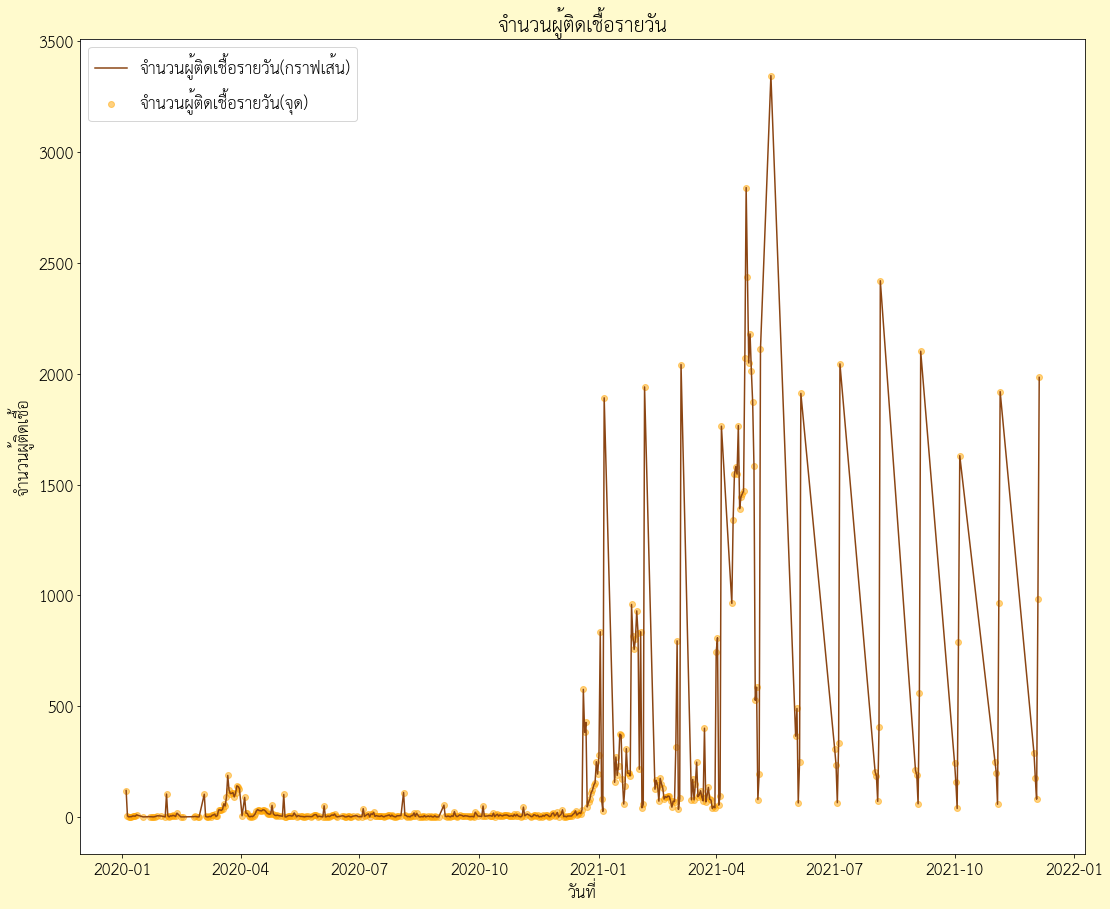

In [340]:
fig = plt.figure(facecolor='lemonchiffon')
plt.title('จำนวนผู้ติดเชื้อรายวัน')
fig.set_size_inches(18, 15)
ax=plt.gca()
sns.lineplot(ax=ax,data=infected,x='วันที่',y='จำนวนผู้ติดเชื้อ',color='saddlebrown')
plt.scatter(infected['วันที่'],infected['จำนวนผู้ติดเชื้อ'],alpha=.5,color='orange')
plt.legend(['จำนวนผู้ติดเชื้อรายวัน(กราฟเส้น)','จำนวนผู้ติดเชื้อรายวัน(จุด)'],loc='upper left')

กราฟแสดงความเปลี่ยนแปลงของจำนวนผู้ติดเชื้อรายวัน จากกราฟนี้เราสามารถสังเกตุได้ถึงจุดที่เริ่มมีการกลับมาระบาดหนักในระลอกใหม่ ว่าเกิดขึ้นช่วงใด และมีปริมาณมากเพียงใด เพื่อที่จะกำหนดระดับการจัดการกับจำนวนผู้ติดเชื้อได้ 
<br>***ข้อควรระวัง*** <br>มีข้อมูลคาดว่ามาจากการทำนายผสมอยู่ด้วย เนื่องจากยังไม่ถึงวันที่จริงแต่ก็มีข้อมูลของวันในอนาคตอยู่ด้วย